# **PIC16A Penguins Project**
*Ben Greer, Arash Dewan, and Reese Henson*


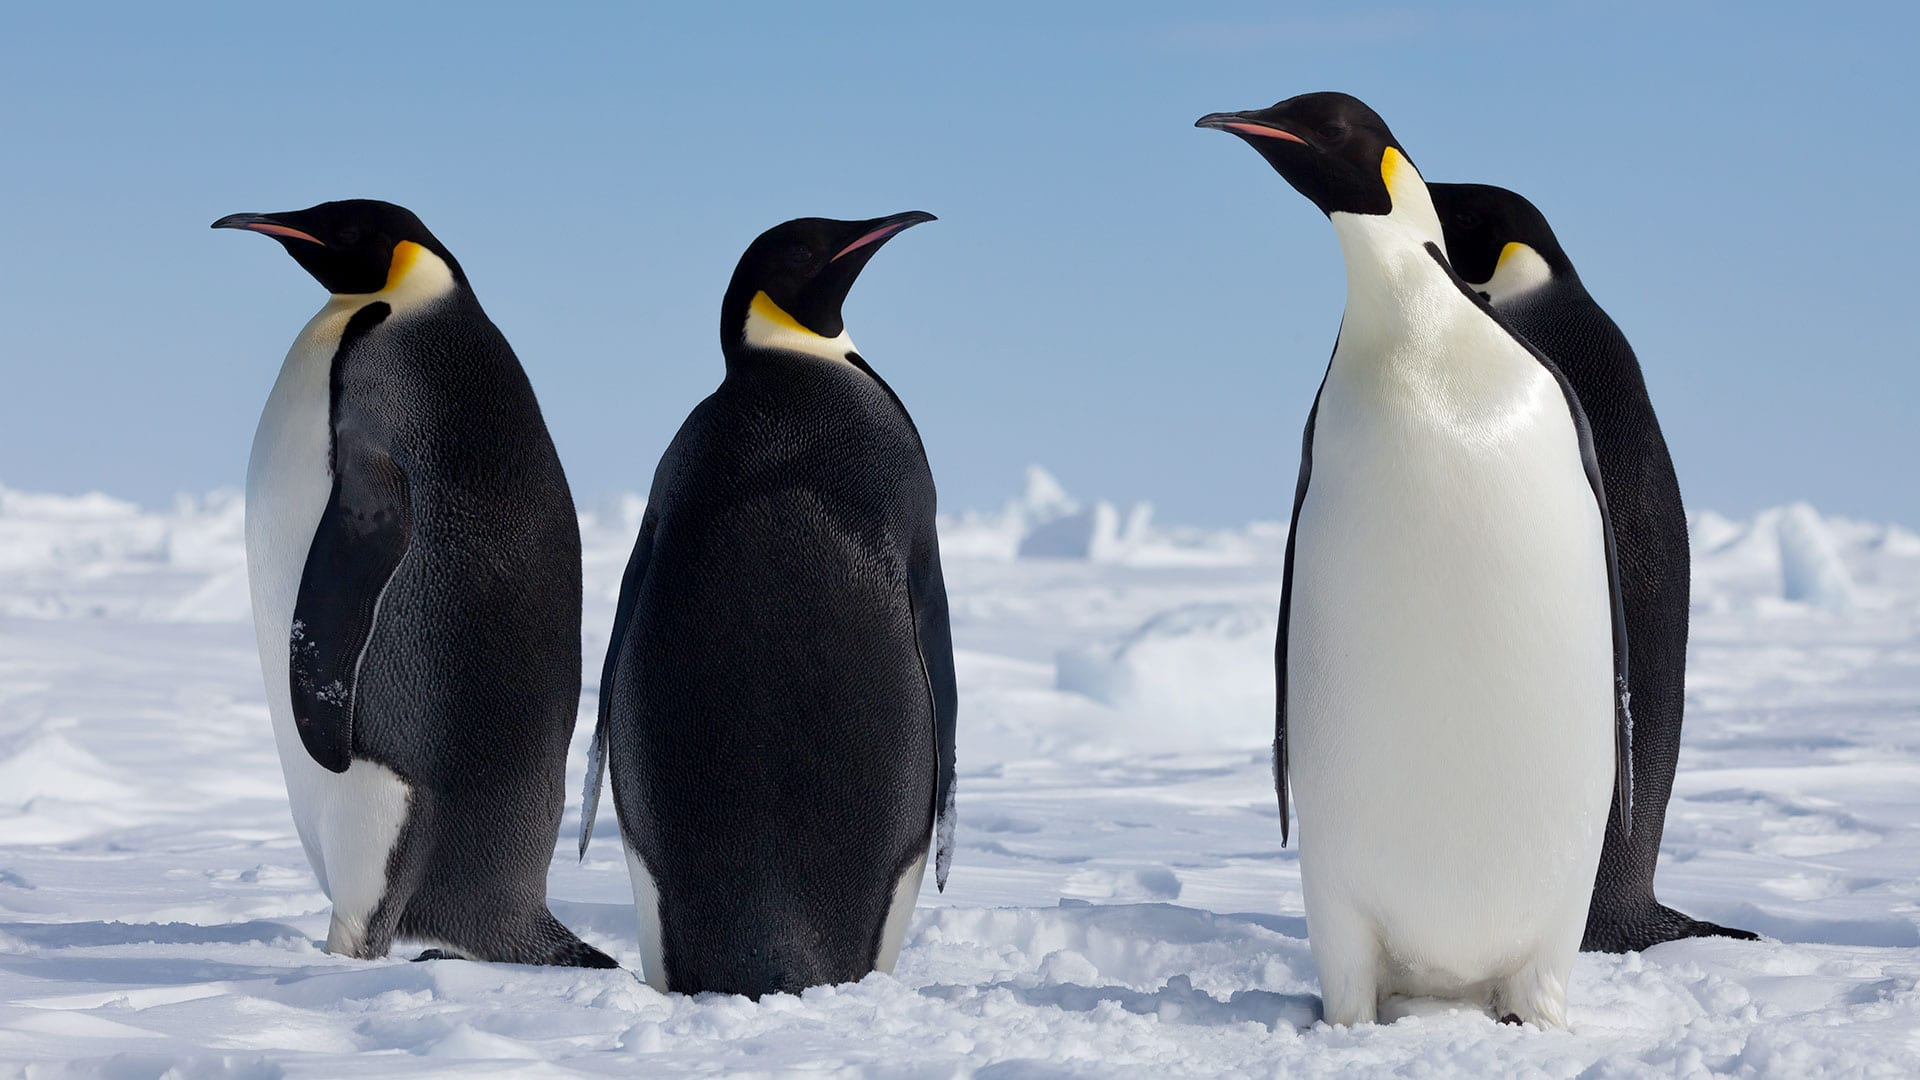

### Introduction

  An important aspect of studies done on animals is the recording and catalogging of a variety of different species of a specific animal. This type of resarch allows us to analyze the ways in which different species vary in specific physiological and environmental features. From this research, we can make predictions about the species of an animal based soley on these catalogged features. In this report, we will focus on a study conducted in Antartica that recorded a variety of physical and environmental features of three species of penguins: Adelie, Chinstrap, and Gentoo. Using this study, we want to find a robust way of predicting the species of a penguin based upon its physical and environmental features. In order to do this, we are going to first conduct an exploratory analysis where we observe the relationships between different features and the three species of penguins. Utilizing this analysis, we will select two quantitative features and one qualitative feature that we believe can be used to make accurate predictions of the type of species of a given penguin. To accomplish this, we are going to deploy and train three seperate machine learning models that can use the features we provide them to make accurate predictions about the species of each penguin. We will then compare each model's accuracy and select the model that makes the best predictions. Throught this report, we want to provide a tutorial on the usage and mechanics of machine learning models as well as the advantages and possible limitations they present. 

### Group Contribution Statement


We all worked together to split and clean the data. Ben did the write ups for the introduction, data import and cleaning, feature selection, and the intro to the modelling section. Arash did the write up for the final discussion. Ben made the pairplot, Arash made the facted histogram, and Reese made the faceted scatter plot. We each did the write ups for our own plots. Ben did the logisitic model, Arash did the nearest neighbor model, and Reese did the ridge regression model. We each did the write ups for our own models. Ben wrote the functions for cleaning, fitting and scoring, confusion matrix, and decision region. We all checked each other’s work and made revisions to code and writing throughout. 

### Data Import and Cleaning

Before conducting an analysis on the data, it is first important to clean the data so it is easier to explore the relationships between different variables and visualize these relationships. To do this, we will split the dataset into predictor variables and our target variable (species), and then make training and testing sets of each dataset. We will then build functions to clean the data and deploy them on each of our datasets. 

#### Importing necessary modules:

First, we are going to import the necessary modules for this report. It is important to note that not all of these modules are nessecary for building and deploying a machine learning model, but will assist us in the utilizing the specific types of analysis and models we chose to conduct in this report. 

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
import statistics as st

#### Importing dataset:

This code imports the dataset we are going to analyze and assigns it to the object, `penguins`. Because we are going to remove some columns and rows from the dataset before conducting an analysis, we are going to wait to provide a codebook describing the variables and the values they can take until the data is cleaned. 

In [2]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

#### Creating train (X) and test (Y) data from dataset:

The following code assigns our predictor variables to the object `X` and our target variable to the object `y`. For this report, every variable except `Species` will be considered a predictor variable. Once we have seperated the data, we use the `train_test_split` function from `sklearn.model_selection` to split our predictor set and target set into training and testing datasets. The training set of data can be thought of as the observations that we are going to use to train our machine learning modules for predicting the target variable. The training set includes 80% of the dataset that was randomly selected. The testing set of the data can be thought of as the observations that we are going to use to test the accuracy of our models once we have trained them. The training set includes 20% of the dataset that was randomly selected. The last line of code checks the shapes of the variables we created to ensure that they were made correctly. 

In [ ]:
# Sets predictor data (X) to include all variables except Species and target data (y) to only Species (our target variable)
X = penguins.drop(labels = "Species", axis = 1)
y = penguins[["Species"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
# Checks that data sets were created correctly
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 16), (344, 1), (275, 16), (69, 16), (275, 1), (69, 1))

#### Cleaning and checking cleanup for X_train and X_test:

Now that we have split our data into testing and training sets, we can clean each dataset without having to worry about posssibly polluting our train and test sets. We are going to do this by creating two functions for cleaning the X sets and y sets. Creating these functions allows us to not have to repeat lines of code for each set, thus expediting the cleaning process.

For the predictor datasets, we are going to first remove unnessecary variables that will not be used in our models. These include `region`, `studyName`, `Individual ID`, `Stage`, `Comments`, `Clutch Completion`, `Date Egg`, and `Sample Number`. These variables will not help us in predicting the species of a given penguin as they do not share any signicant relationships with each species, and thus should be removed from our predictor sets. Then, we drop all of the rows that include NaN or Na values so that we can run numerical analysis without running into any errors. Next, we noticed that there were a few penguin observations whose `Sex` varible were coded as neither MALE or FEMALE, but as a period. Due to this, we remove all of the rows where `Sex` is coded as a period. Lastly, when creating machine learning models that utilize qualitative featurs, it is important to ensure that the values of the qualitative variables are coded as integers, and not strings. This helps the machine learning model visualize these variables as numeric, and thus evaluate numerical analysis on them. We recoded the `Sex` variable values from MALE and FEMALE to 1 and 2 and recoded the `Island` variable values from Torgersen, Dream, and Biscore to 1, 2 and 3. We now have a function that can be used on each of our predictor sets to clean them up! Great!

In [ ]:
def X_cleanup(X):
  """
  X_cleanup: A function that takes in a dataframe X and cleans it so it is ready for analysis
  Paramaters: 
    X: The dataframe to be cleaned
  Returns:
    X: The cleaned data frame
  """
  # Drops unnessecary colums from X
  X = X.drop(["Region", "studyName", "Individual ID", "Stage", "Comments", 
            "Clutch Completion", "Date Egg", "Sample Number"], axis = 1)
  
  # Drops NaN and Na values from X
  X = X.dropna()

  # Removes rows in X where "Sex" is coded as "."
  X = X[X["Sex"] != "."]

  # Recodes Sex values of MALE and FEMALE to 1 and 2 respectively
  X["Sex"] = X["Sex"].map({"MALE": 1, "FEMALE": 2})

  # Recodes Island values of Torgersen, Dream, and Biscoe to 1, 2 and 3 respectively
  X["Island"] = X["Island"].map({"Torgersen": 1, "Dream": 2, "Biscoe": 3})
  
  return X

In [ ]:
# Cleaning X_train, X_test and X
X_train = X_cleanup(X_train)
X_test = X_cleanup(X_test)
X = X_cleanup(X)

Now that we have cleaned the data, we can provide a code book that describes each predictor variable and the values they can take. Here is the codebook for these datasets:

- `Island`: The island that the penguin was found habititing. Can be 1, 2, or 3, representing the 3 islands that were catalogged in this study.
- `Culmen Length (mm)`: The culmen (beak) length of the penguin in millimeters.
- `Culmen Depth (mm)`: The culmen (beak) depth of the penguin in millimeters.
- `Flipper Length (mm)`: The flipper length of the penguin in millimeters.
- `Body Mass (g)`: The total body mass of the penguin in grams.
- `Sex`: The sex of the penguin. Can be 1 or 2, representing male and female respectively. 
- `Delta 15 N (o/oo)`: The ratio of stable isotopes 15N:14N found in the blood sample of the penguin.
- `Delta 13C (o/oo)`: The ratio of stable isotopes 13C:12C found in the blood sample of the penguin. 

In [ ]:
# Checking that X_train, X_test, and X were cleaned correctly
X_train, X_test, X

(     Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
 323       3                49.1               15.0                228.0   
 149       2                37.8               18.1                193.0   
 288       3                43.5               14.2                220.0   
 146       2                39.2               18.6                190.0   
 227       3                46.7               15.3                219.0   
 ..      ...                 ...                ...                  ...   
 204       2                45.7               17.3                193.0   
 53        3                42.0               19.5                200.0   
 294       3                46.4               15.0                216.0   
 211       2                45.6               19.4                194.0   
 303       3                50.0               15.9                224.0   
 
      Body Mass (g)  Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
 323         5500.0  

#### Cleaning and checking cleanup for y_train and y_test:

For the target datasets, we are only going to run two lines of code to clean the data. First, we use the indicies of our predictor datasets to ensure that the rows of our target datasets match up to the rows of our predictor datasets. Then, we recode the values of the `Species` variable from Adelie Penguin (Pygoscelis adeliae), Chinstrap penguin (Pygoscelis antarctica), and Gentoo penguin (Pygoscelis papua), to 1, 2, and 3 respectively. Recall to the previous function that it is important to always recode your qualitative variables to integers so that the machine learning models can run numerical analyses on them. 

In [ ]:
def y_cleanup(y, X):
  """
  y_cleanup: A function that takes in a data frame y and a data frame X and cleans y so it is ready for analysis
  Paramaters:
    y: The data frame to be cleaned
    X: Another data frame that is used to ensure the same indicies are used for y and X
  Returns:
    y: The cleaned data frame
  """
  # Ensures that indicies of y are the same as the indicies of X
  y = y.loc[X.index.to_numpy()]

  # Recodes the values of species from Adelie, Chinstrap, and Gentoo to 1, 2, and 3 respectively
  y["Species"] = y["Species"].map({"Adelie Penguin (Pygoscelis adeliae)": 1,
                                 "Chinstrap penguin (Pygoscelis antarctica)": 2,
                                 "Gentoo penguin (Pygoscelis papua)": 3})
  return y

In [ ]:
# Cleaning y_train, y_test, and y
y_train = y_cleanup(y_train, X_train)
y_test = y_cleanup(y_test, X_test)
y = y_cleanup(y, X)

The codebook for the target datasets is:

-`Species`: The species of the penguin. Can be 1, 2, 3, representing the three distinct species of penguins in this study. 

In [ ]:
# Checks that y_train, y_test, and y were cleaned properly
y_train, y_test, y

(     Species
 323        3
 149        1
 288        3
 146        1
 227        3
 ..       ...
 204        2
 53         1
 294        3
 211        2
 303        3
 
 [258 rows x 1 columns],      Species
 64         1
 237        3
 115        1
 97         1
 37         1
 ..       ...
 224        3
 167        2
 296        3
 40         1
 304        3
 
 [66 rows x 1 columns],      Species
 1          1
 2          1
 4          1
 5          1
 6          1
 ..       ...
 338        3
 340        3
 341        3
 342        3
 343        3
 
 [324 rows x 1 columns])

### Exploratory Analysis

An important part of the machine learning process is exploring the relationships between different predictor variables and the target variable. This analysis will help us in selecting which features we want to use for our models. The features that appear to have a stronger relationship with our target variable will do a better job at predicting the species of a penguin, so throughout our exploratory analysis we are going to observe which variables appear to have the strongest relation ship with our target variable. 

In order to make visualizations of the relationships between our predictors and our target, we need to make a temporary data frame that is not split by the two. Normally, we could use our cleanup functions from the previous section to clean this data frame, but we don't want to recode the Island variable so that we can see the actual names of each island in our visualizations, so we do the cleanup process line by line. We then made a table comparing the mean culmen length, flipper length, body mass, and Delta 15N for each species, island, and sex of the penguins. This allows us to take an initial look at what variables may have a strong relationship with the species of a penguin. 

In [ ]:
# Creates a temporary data frame for visual analysis. Executes the same functions as X_cleanup but doesn't recode Island variable so X_cleanup was not used
temp_df = penguins
temp_df = temp_df.drop(["Region", "studyName", "Individual ID", "Stage", "Comments", 
            "Clutch Completion", "Date Egg", "Sample Number"], axis = 1)
temp_df = temp_df.dropna()
temp_df = temp_df[temp_df["Sex"] != "."]
temp_df["Sex"] = temp_df["Sex"].map({"MALE": 1, "FEMALE": 2})

# Creates a table comparing the mean culmen length, flipper length, body mass, and Delta 15 N for each species, island, and sex
temp_df.groupby(["Species", "Island", "Sex"])["Culmen Length (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)"].mean()

Culmen Length (mm)  \
Species                                   Island    Sex                       
Adelie Penguin (Pygoscelis adeliae)       Biscoe    1             40.590909   
                                                    2             37.359091   
                                          Dream     1             40.012000   
                                                    2             36.911111   
                                          Torgersen 1             40.752381   
                                                    2             37.436364   
Chinstrap penguin (Pygoscelis antarctica) Dream     1             51.069697   
                                                    2             46.573529   
Gentoo penguin (Pygoscelis papua)         Biscoe    1             49.510000   
                                                    2             45.563793   

                                                         Flipper Length (mm)  \
Species                                   Island    Sex                        
Adelie Penguin (Pygoscelis adeliae)       Biscoe    1             190.409091   
                                                    2             187.181818   
                                          Dream     1             192.520000   
                                                    2             187.851852   
                                          Torgersen 1             195.761905   
                                                    2             188.727273   
Chinstrap penguin (Pygoscelis antarctica) Dream     1             199.727273   
                                                    2             191.735294   
Gentoo penguin (Pygoscelis papua)         Biscoe    1             221.533333   
                                                    2             212.706897   

                                                         Body Mass (g)  \
Species                                   Island    Sex                  
Adelie Penguin (Pygoscelis adeliae)       Biscoe    1      4050.000000   
                                                    2      3369.318182   
                                          Dream     1      4052.000000   
                                                    2      3344.444444   
                                          Torgersen 1      4059.523810   
                                                    2      3390.909091   
Chinstrap penguin (Pygoscelis antarctica) Dream     1      3938.636364   
                                                    2      3527.205882   
Gentoo penguin (Pygoscelis papua)         Biscoe    1      5488.750000   
                                                    2      4679.741379   

                                                         Delta 15 N (o/oo)  
Species                                   Island    Sex                     
Adelie Penguin (Pygoscelis adeliae)       Biscoe    1             8.872945  
                                                    2             8.774242  
                                          Dream     1             8.984427  
                                                    2             8.914803  
                                          Torgersen 1             8.919919  
                                                    2             8.663160  
Chinstrap penguin (Pygoscelis antarctica) Dream     1             9.464535  
                                                    2             9.250962  
Gentoo penguin (Pygoscelis papua)         Biscoe    1             8.303429  
                                                    2             8.193405

From this table, we can see that there are signicant differences among each mean across the different species, islands, and sex, so we are going to make visualizations of each of these variables to assist in finding the best variables to use for our machine learning model. 

Text(0.5, 1.08, 'Pairplot of Culmen Length, Culmen Depth, and Body Mass')

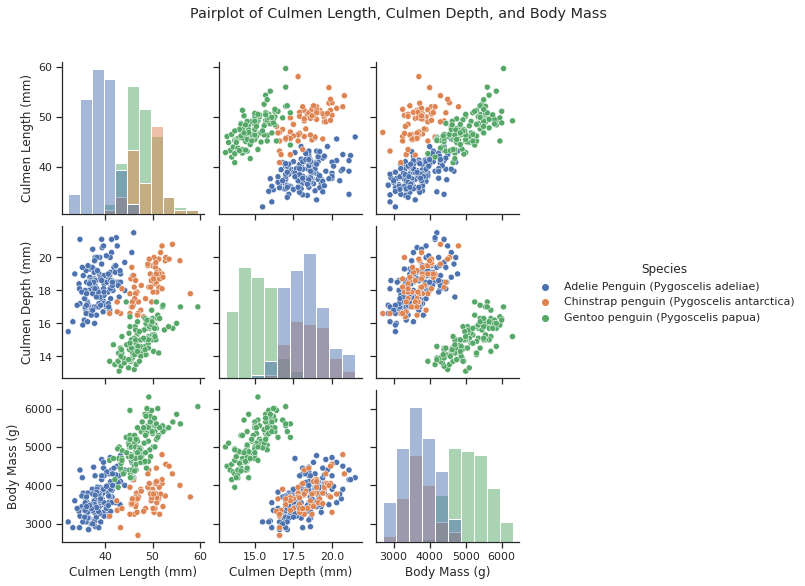

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(temp_df[["Culmen Length (mm)", "Culmen Depth (mm)", "Body Mass (g)","Species"]], 
             hue = "Species", diag_kind = 'hist', ).fig.suptitle("Pairplot of Culmen Length, Culmen Depth, and Body Mass", y = 1.08)

From the above plot, we observe that when looking at culmen length and culmen depth, the species are fairly seperated, suggesting that these two variables could be good predictors for the species of a penguin. The more seperated the points are, the easier it will be for our model to predict the species without running into false positives and false negatives. Additionally, it looks as though body mass and culmen length may also be good predictors for our model. 

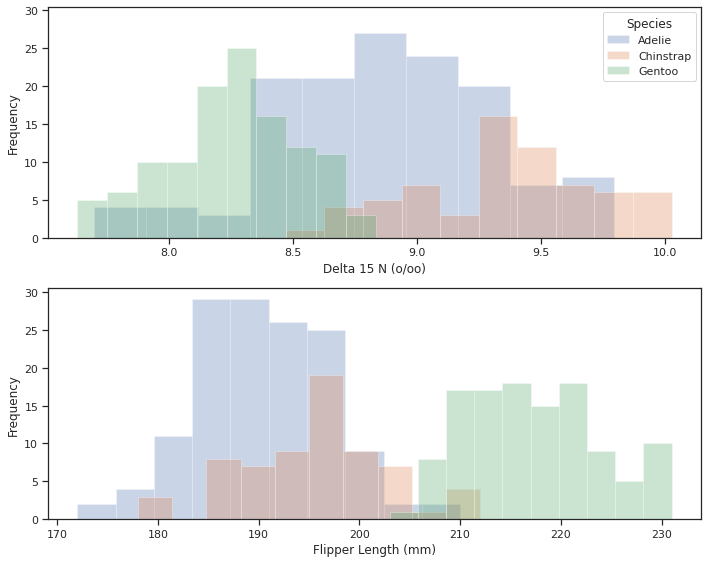

In [ ]:
fig, ax = plt.subplots(2, figsize = (10,8), sharey = True)
#creating a function that we can call to take in the various types of data we need
def hist(df, column, alpha, index):
  ax[index].hist(df[column], alpha = alpha)
  ax[index].set(ylabel = "Frequency",
         xlabel = column
         )
temp_df.groupby("Species", as_index = False).apply(hist, "Delta 15 N (o/oo)", 0.3, 0)
temp_df.groupby("Species", as_index = False).apply(hist, "Flipper Length (mm)", 0.3, 1)
ax[0].legend(labels = ["Adelie", "Chinstrap", "Gentoo"], title = "Species")
plt.tight_layout()

In the two visualizations above, we are examining two possible variables of `Delta 15 N (o/oo)` and `Flipper Length (mm)` through the use of histograms. We use a temporary dataframe that groups the data by species, and apples a hist function that takes in the variable we want to use, along with a few other parameters to help with fine tuning the plots. By observing the data, we are trying to look for which category has the most separation in the plot. When there is a large portion of the data in the three species that overlaps, it shows us that it would not be good to use for predictive modeling. By looking at the histograms, the first one that looks at `Delta 15 N (o/oo)` seems to have a great deal of overlap from 8.5 to 9.5; this would be a poor feature to use for modeling. On the other hand, `Flipper Length (mm)` there is a bit more separation, especially between the Adelie and Gentoo species. Although Chinstrap does overlap with Adelie quite a bit, we can still take this feature into consideration when doing modeling.

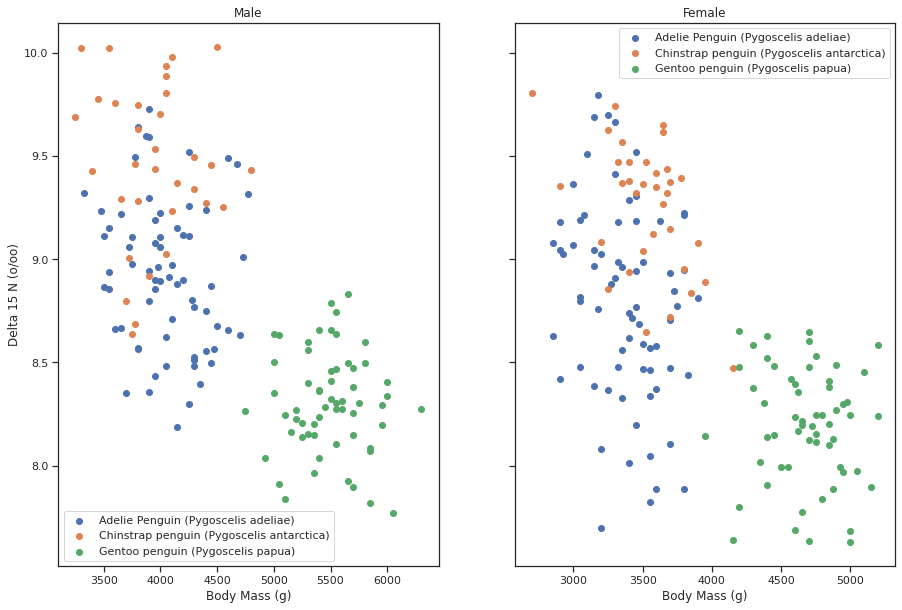

In [ ]:
#scatter plot
fig, ax = plt.subplots(1, 2, figsize = (15,10), sharey = True)

#a list of unique species
unique = list(set(temp_df['Species']))

#labeling x and y values and titles of scatterplot
ax[0].set(xlabel = "Body Mass (g)",
          ylabel = "Delta 15 N (o/oo)",
          title = "Male")
ax[1].set(xlabel = "Body Mass (g)",
          title = "Female")

#scatter values of every unique species for each sex
for i in range(len(unique)):
  massM = temp_df['Body Mass (g)'][temp_df['Species'] == unique[i]][temp_df['Sex'] == 1]
  nitroM = temp_df['Delta 15 N (o/oo)'][temp_df['Species'] == unique[i]][temp_df['Sex'] == 1]
  massF = temp_df['Body Mass (g)'][temp_df['Species'] == unique[i]][temp_df['Sex'] == 2]
  nitroF = temp_df['Delta 15 N (o/oo)'][temp_df['Species'] == unique[i]][temp_df['Sex'] == 2]
  
  ax[0].scatter(massM, nitroM)
  ax[0].legend(unique)

  ax[1].scatter(massF, nitroF)
  ax[1].legend(unique)

For the two scatterplot models, the variables that are compared to each other according to the individual penguins’ ‘Species’ and ‘Sex’ were ‘Body Mass (g)’ and ‘Delta 15 N (o/oo)’. After creating the two plots that represent the different ‘Sex’ values, “MALE” and “FEMALE”, we can make a list of unique ‘Species’ to help individually scatter our x-axis (‘Body Mass (g)’) and y-axis (‘Delta 15 N (o/oo)’) values according to the different species; therefore, giving each unique species a different color on the plots. Looking at the data, we can rule out ‘Delta 15 N (o/oo)’ when modeling our data because the range in values is around 7.5-10.0, which is not a major difference in comparison to ‘Body Mass (g)’. In addition, ‘Delta 15 N (o/oo)’ merely reflects the diet of specific organisms, in this case penguins; therefore, would not be as helpful in differentiating between the unique species. In the case of ‘Body Mass (g)’ we could also omit it from our modeling figures because the range in values for two species are nearly identical which would make predicting the different species to be much more difficult.

### Feature Selection

Now that we have conducted an exploratory analysis on the data, we can begin to find what features we want to use for training our machine learning models. In order to do this, we selected a few combinations of different features and used a logistic regression model to evaluate the cross-validation and testing scores for each feature combination. We elected to use `Sex` and `Island` as our two possible qualitative features and `Culmen Length (mm)`, `Body Mass (g)`, `Culmen Depth (mm)`, and `Flipper Length (mm)` as our possible quantitative features. `Sex` and `Island` were the only two qualitative features in this study and also appeared to both share some relationships with the target variable in the above plots, so we decided to include both in our feature selection process. The quantitative features we chose also proved to each have strong relationships with the target variable in the above plots, so we made four possible combinations of each feature to find which combination yields the most accurate predictions. In order to accomplish this, we made two functions: `cv_score` and `test_data_score` that both take in a list of columns to be scored and the model we use to score the columns. `cv_score` returns the cross-validation score of the model using the specified columns and `test_data_score` returns the test score of the model using the specified columns. We then run a for loop that iterates through each of our possible combinations of features and deploys both functions using each combination and a logistic regression model. We elected to use a logistic regression model because we are planning on using it as one our machine learning models and it is faster to train than most other models. This is due to the fact that logisitic regression uses a single equation, a sigmoid function, to predict the probability of each observation falling into each target class. Logistic regression models, however, are typically used when the target variable is binary, or, can take one one of two values. In the case of this report, our target variable can take on three different values, so we are using a different form of Logistic Regression called multinominal. Multinominal logistic regression uses a softmax activation function to assign the probability of each species for each observation, and uses the highest probability to predict the species. This approach is still much faster than a lot of other machine learning models as it still utilizes a single function to make predictions.

In [ ]:
# Sets potential_features to the different combinations of features found from the above plots
potential_features = [['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'], ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'], 
                      ['Island', 'Culmen Length (mm)', 'Body Mass (g)'], ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']]

def cv_score(cols, model):
  """
  cv_score: A function that takes in specified columns and a model and returns the mean of 10 cross-validation scores of the model using the specified cols
  Parameters:
    cols: A list of features in the data set to be scored
    model: The model to be used for cross-validation
  Returns: 
    cv_score prints the columns it is using and returns the mean of 10 cross_validation scores of the model using the specified columns
  """
  print("Using columns: {0}".format(cols))
  return cross_val_score(model, X_train[cols], np.array(y_train["Species"]), cv = 10).mean()


def test_data_score(cols, model):
  """
  test_data_score: A function that takes in specified columns and a model and returns the score of the fitted model against the test set
  Parameters:
    cols: A list of features in the data set to be scored
    model: The model to be used for cross-validation
  Returns:
    test_data_score fits the model using the specified columns and returns the score of the fitted model against the test set
  """
  return model.fit(X_test[cols], np.array(y_test["Species"])).score(X_test[cols], np.array(y_test["Species"]))

for features in potential_features:
  print("CV score: {0}".format(cv_score(features, LogisticRegression(max_iter = 500))))
  print("Test score: {0}".format(test_data_score(features, LogisticRegression(max_iter = 500))))

Using columns: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score: 0.9884615384615385
Test score: 0.9848484848484849
Using columns: ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score: 0.9615384615384617
Test score: 0.9545454545454546
Using columns: ['Island', 'Culmen Length (mm)', 'Body Mass (g)']
CV score: 0.9689230769230772
Test score: 0.9393939393939394
Using columns: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score: 0.9692307692307693
Test score: 0.9090909090909091


Observing the output of our for loop, we see that the first combination of features yielded the best CV score. However, it is also important to check the test scores of the combinations so that we avoid selecting features that result in overfitting. If our test score isn't great, then we could be overfitting the data. So, the best combination of features is `['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']` because they yielded the best test score while still maintaining a good cross-validation score. Now, we can modify our X sets so that they only includes our selected features. 

In [ ]:
# Sets features to best features found from above functions
features = ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

# Sets X, X_train, and X_test to only include features columns
X = X[features]
X_train = X_train[features]
X_test = X_test[features]

### Modeling


Now that we have selected the features for our models, we can train our machine learning models and interperet them using train/test scores, confusion matrices, and decision regions. We are going to use three different models for this section: Logistic Regression, Nearest Neighbors, and Ride Regression. To build and train these models, we are going to deploy a three step process that ensures that our models are the most accurate at predicting the target data. To do so, we first find the best hyper parameters for each of our model using Cross-Validation or Grid Search Cross Validation depending on each model. This will help us to ensure that we have the most accurate versions of our models. Next, we fit each model using the hyper parameters we found and evaluate the training and testing scores of the model to observe the accuracy of the model and to ensure that we are not overfitting or underfitting our data. Lastly, we will deploy a confusion matrix and decision region for the model to have a more concrete visualizations of the model's predictions and to observe where our models may be overfitting or underfitting the data. After all of this is completed, we will interpert the accuracy of our models and discuss the advantages and disadvantages of each model and what we could do to imporve our machine learning models in the future. 

#### Defining Functions

Because we are going to be using similiar lines of code for each function, we are first going to define a three functions that can be applied to each of our machine learning models. The first function, `fit_and_score`, fits the model to the training data, prints the testing and training scores of the fitted model, and returns the fitted model. The second function, `ConfusionMatrix`, displays a matrix of the model's predictions for the species each observations and the actual species of each observation. This will help us to see which species the model was best at predicting, and where we could possibly improve the model. The third function, `DecisionRegion`, makes a plot that displays all of the observations as a scatter plot and overlays a contour plot that displays the predictions our model made for each possible value of each feature. This visualization will also assist us in observing the accuracy of our model as well where it might be overfitting or underfitting the data. For a more detailled description of each function, look to the docstrings of the functions. 

In [ ]:
def fit_and_score(model):
  """
  fit_and_score: A Function that takes in a model with specified paramaters and fits the model to the training data and scores it against the training and testing data
  Paramaters:
    model: A model with specified paramaters that should be fit
  Returns:
    fit_and_score prints the scores of the fitted model against the train data and the test data and returns the fitted model
  """
  print("Score on the training data:", model.fit(X_train, np.array(y_train["Species"])).score(X_train, np.array(y_train["Species"])))
  print("Score on the testing data:", model.fit(X_train, np.array(y_train["Species"])).score(X_test, np.array(y_test["Species"])))
  return model.fit(X_train, np.array(y_train["Species"]))

In [ ]:
def ConfusionMatrix(model):
  """
  ConfusionMatrix: A function that takes in a fitted model and prints the accuracy score of its predictions as well as a confusion matrix for the fitted model
  Parameters:
    model: A fitted model
  Returns:
    ConfusionMatrix does not return any values and instead prints the accuracy score of the fitted model's predictions and a confusion matrix for the fitted model
  """
  # Evaluates the classifier on the test set
  y_pred = model.predict(X_test)
  print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
  # Creates a confusion matrix
  cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                    index = ['Actual ' + i for i in ["Adelie", "Chinstrap", "Gentoo"]],
                    columns = ['Predicted ' + i for i in ["Adelie", "Chinstrap", "Gentoo"]])
  print('Confusion Matrix:')
  display(cm)

In [ ]:
def DecisionRegion(model, X_set = X, y_set = y, increment = 0.01):
  """
  DecisionRegion: A function that takes in a fitted model and two sets of data and makes a decision region plot based on the model and sets of data
  Parameters: 
    model: A fitted model
    X_set: A data frame of predictor variables. Can be an entire data set, the training set, or the testing set. Default is X (entire set of predictors)
    y_set: A data frame of the target variable. Can be the entire data set, the training set, or the testing set. Defauilt is y (entire set of targets)
    increment: Adjusts number of data points created for meshgrid. Default is 0.01. Adjusting increment can assist with the runtime for different model families
    (Note - X_set and Y_set must have the same number of rows, i.e if X_set = X_train then y_set must = y_train or if X_set = X then y_set must = y)
  Returns:
    DecisionRegion does not return any values and instead plots the decision region of the fitted model for X_set and y_set
  """

  # Checks if X_set and y_set are the same number of rows and raises a TypeError if not
  if X_set.shape[0] != y_set.shape[0]:
    raise TypeError("X_set and Y_set must have the same number of rows!")

  # Creates two dictionaries. One for labeling the Sex of each plot and the other for labeling the suptitle of the entire plot
  sex_dict = {1: "Male", 2: "Female"}
  title_dict = {X.shape: "Full Data Set", X_train.shape: "Training Set", X_test.shape: "Testing Set"}

  # Creates string for the model being used
  model_string = str(model).split("(")[0]

  # Assigns the unique qualitative variable values of X to unique_qual_values
  unique_qual_values = [int(i) for i in np.unique(X["Sex"])]

  # Creates a 2 side by side plots that share a y-axis
  fig, ax = plt.subplots(1, 2, figsize = (12, 7), sharey = True)

  # Creates a meshgrid of the dataset (uses all possible values (incrementing by 0.01) from min to max of each feature in X)
  f1_min, f1_max = X["Culmen Length (mm)"].min() - 1, X["Culmen Length (mm)"].max() + 1
  f2_min, f2_max = X["Culmen Depth (mm)"].min() - 1, X["Culmen Depth (mm)"].max() + 1
  f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, increment), np.arange(f2_min, f2_max, increment))

  # For loop that iterates through each unique value of the qualitative feature of X
  for i in unique_qual_values:

    # Predicts the species of each point in the meshgrid
    Z = model.predict(np.c_[np.ones(f1.ravel().shape) * 1.0 * i, f1.ravel(), f2.ravel()])
    Z = Z.reshape(f1.shape)

    # Plots the test set samples as a scatter plot
    ax[i - 1].scatter(X_set[X_set["Sex"]==i]["Culmen Length (mm)"], 
                       X_set[X_set["Sex"]==i]["Culmen Depth (mm)"], 
                       c=y_set[X_set["Sex"]==i]["Species"], cmap='jet') 
  
    # Plots the decision regions
    ax[i - 1].contourf(f1, f2, Z, alpha=0.2, cmap='jet') 
    
    # Sets the xlabel of the plot to Culmen Length (mm) and the title to the respective qualitiative feature value
    ax[i - 1].set_xlabel('Culmen Length (mm)')
    ax[i - 1].set_title('Sex = ' + sex_dict[i])

  # Makes a legend for each species and their respective color
  legend0 = mpatches.Patch(color = 'red', label = 'Adelie', alpha = 0.2)
  legend1 = mpatches.Patch(color = 'green', label = 'Chinstrap', alpha = 0.2)
  legend2 = mpatches.Patch(color = 'blue', label = 'Gentoo', alpha = 0.2)
  fig.legend(handles = [legend0, legend1, legend2],loc = (0.85,0.8), fontsize = 'medium',framealpha = 1)

  # Sets the ylabel for the entire plot to Culmen Depth (mm) and the title for the entire plot to the type of data set used for X_set and y_set as well as the model and parameters used
  ax[0].set_ylabel('Culmen Depth (mm)')
  plt.suptitle('Decision Regions of the {0} Classifier: {1}'.format(model_string, title_dict[X_set.shape]))
  plt.tight_layout()
  plt.show()

#### Logistic Regression Classification


The first model we are going to train is a Logisitic Regression classification model. As stated previously, Logistic Regression models using the multinominal approach utilize a sigmoid function and a softmax activation function to assign probabilities to each observation, and makes predictions based on these probabilities.

##### Finding best Hyper Parameter (max_iter) using Cross-Validation

The hyper parameter that we are going to focus on optimizing is max_iter. Logistic Regression models run a number of iterations for the solver to converge on a solution. The solver of this model is the algorithm used by Logisitc Regression to find the best paramaters that minimize the cost function, which is the error between predicted outputs and actual outputs. Max_iter is thus the maximum number of iterations the logistic model will run to converge on the solution before stopping. The model will stop iterating through solutions once the max_iter is reached, and display the solution found. If the max_iter is reached before finding this solution, then the model will just output the most recently calculated solution. So, we need to optimize this hyper paramater so that our model only iterates to the iteration where it finds the best solution. To do this, we are going to loop through different possible values of max_iter and return the best cross validation score found from all of the iterations. 

In [ ]:
max_score = 0

# For loop that iterates from 0 to 49
for iter in range(50):

  # Ignores any warnings from LogisticRegression() (there were often warnings when the max_iter was small and it would make the output very hard to read)
  warnings.simplefilter("ignore")

  # Sets cv_score to the mean cross-validation score of the LogisticRegression model
  cv_score = cross_val_score(LogisticRegression(max_iter = iter*10), X_train, np.array(y_train["Species"]), cv = 10).mean()

  # Checks if the cv_score is larger than the current max and sets max_score to current cv_score and best_max_iter to iter*10 if yes
  if cv_score > max_score:
    max_score = cv_score
    best_max_iter = iter*10
    
print("The best value for max_iter is {0} with a cross-validation score of {1}".format(best_max_iter, max_score))

The best value for max_iter is 100 with a cross-validation score of 0.9923076923076923


##### Fitting and Scoring the Logistic Regression Model

Now that we have found the best value for max_iter, we can fit our model to the training data and evaluate the testing and training score. Observing the output below, we can see that our model has a relatively high training score, and a somewhat high testing score. This leads us to believe that although we are using the best value for max_iter, our model may be overfitting the data slightly, as it did not preform incredibly well at predicting the test data. 

In [ ]:
logistic_model = fit_and_score(LogisticRegression(max_iter = best_max_iter))

Score on the training data: 0.9961240310077519
Score on the testing data: 0.9696969696969697


##### Confusion Matrix of the Logistic Regression Model

The confusion matrix for this model shows us where are model's predictions were false positives and false negatives. We can see from the output below that our model was able to predict the Gentoo species with 100% accuracy, and innacurately predicted 1 Adelie penguin as Chinstrap and 1 Chinstrap penguin as Adelie. Looking back to our exploratory section, we observe that the gentoo species have more distinguishing features than the other species, specifcally culmen depth, so it makes sense that our model was able to predict the Gentoo penguins at a significantly high success rate. 

In [ ]:
ConfusionMatrix(logistic_model)

Accuracy: 0.97
Confusion Matrix:


,Predicted Adelie,Predicted Chinstrap,Predicted Gentoo
Actual Adelie,29,1,0
Actual Chinstrap,1,15,0
Actual Gentoo,0,0,20


##### Decision Region of the Logisitic Regression Model

Obseving the decision region for our model, we can see where our model incrroectly predicted the species of a few penguins and more genearlly, how our model would predict unseen data. Each region represents the species the model would predict based on the culmen depth and culmen length of the penguin. So, if we were given the culmen depth, culmen length, and sex of a penguin, we could use our decision region to a make a somewhat accurate prediction of the species of the penguin. For example, lets say we just found a female penguin with a culmen depth of 19mm and a culmen length of 51mm. We would predict this penguin to be of the Chinstrap species, as the point (51, 19) on our female plot is highlighted green, which corresponds to Chinstrap.

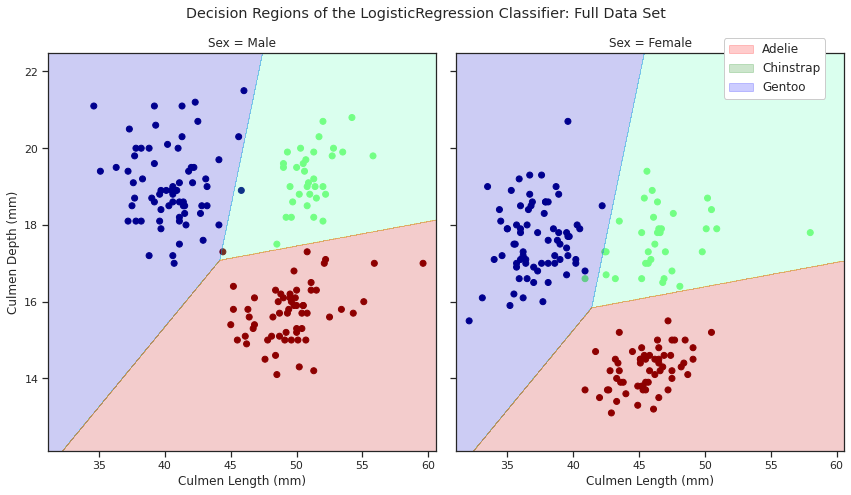

In [ ]:
DecisionRegion(logistic_model, X, y)

#### Nearest Neighbors Classification

The next model we will be using is K-Nearest Neighbors Classification, which is a machine learning algorithm that will allow us to determine the species of the penguins based on the given features we selected. Through this algorithm we find the closest data points in the training data to any other observation, and assign a frequency label among the most representative of neighbors to the test data points. The algorithm is then able to check the distance between data points, and formulate a prediction of what the target is. 

##### Testing The data without Cross-Validation

First, to test how `KNeighborsClassifier` works, we wanted to skip over the cross-validation process and make sure the model runs properly. The hyper parameter used was solely off guessing and resulted in a score of 0.89, meaning the model correctly predicted the species of 89% of the test set. This also helps us visualize what the code looks like before cross validation, so we can compare it in the future. 

In [ ]:
#defining a KNN model with that runs the test before using cross validation to find the best hyper parameters
model1 = KNeighborsClassifier(n_neighbors = 50)
model1.fit(X_train, y_train["Species"])
test_score = model1.score(X_test, y_test["Species"])
train_score = model1.score(X_train, y_train["Species"])
print('Testing Score Without CV: {:,.4f}'.format(test_score))
print('Training Score Without CV: {:,.4f}'.format(train_score))

Testing Score Without CV: 0.8939
Training Score Without CV: 0.9225


##### Finding Best Hyper Parameters (n_neighbors, leaf_size) with Grid Search Cross Validation

In the below two blocks of code, we are taking a look at the hyper parameters that are used in KNiehgborsClassifier. the `n_neighbors` parameter determines the number of nearest neighbors we want to consider when making the prediction. We also have the`leaf_size` parameter allows us to choose how many data points we want to use when searching for the neighboring data points. The `weight` parameter can take in two different values of either 'uniform' or 'distance'. For 'uniform' all the points in the neighborhood are weighted equally, while for 'distance', the algorithm assigns greater influence to closer neighbors. Furthermoe, we are using `GridSearchCV` for cross-validation in this model because it is necessary to test multiple parameters with various ranges in order to find the parameters that give us the best score. Here we see a `leaf_size` of 1,  `n_neighbors` of 3, and a `weight` of ‘uniform’ are the best parameters.


In [ ]:
warnings.simplefilter("ignore") #ignores warnings of KNieghborsClassifier do to poor parameters as it goes through the GridSearchCv
model2 = KNeighborsClassifier()
#creating a dictionary where that will be set in the GridSearchCV to run through a range of values for the hyper parameters of n_neighbors and leaf_size
param_grid = {'n_neighbors' : np.arange(1,10),
              'leaf_size' : np.arange(1,20)}
#with GridSearchCV, we are able to test multiple parameters within a range of values to find the best accuracy
model2_gscv = GridSearchCV(model2, param_grid, cv = 10)
model2_gscv.fit(X, y)
print('Best Parameters: {0}'.format(model2_gscv.best_params_))


Best Parameters: {'leaf_size': 1, 'n_neighbors': 3}


##### Finding Best Hyper Parameter (weights) with Grid Search Cross Validation

In [ ]:
warnings.simplefilter("ignore") #ignores warnings of KNieghborsClassifier do to poor parameters as it goes through the GridSearchCv 
#recreated a KNN model but instead set the best hyper parameters we got from the above section
model3 = KNeighborsClassifier(n_neighbors = 3, leaf_size = 1)
#creating a dictionary where with different 'weights' parameters so that we can see what the most accurate one is for our code
w_grid = dict()
w_grid['weights'] = ['distance', 'uniform']
model3_gscv = GridSearchCV(model3, w_grid, cv = 10)
model3_gscv.fit(X, y)
print('Best Parameter: {0}'.format(model3_gscv.best_params_))


Best Parameter: {'weights': 'uniform'}


##### Fitting and Scoring for Nearest Neighbors Model

With the updated best hyper parameters, we fit and score the Nearest Neighbors model which gives us a training data score of 0.992 and testing data score of .939. Although there is some variation between the two datasets, indicating that there has been some overfitting due to the test data being lower than the train, we can notice an improvement with cross validation in comparison to when we tested the data without taking that step. Our test data went from correctly predicting the species of 89% of the data set, to being able to predict the species of 94%.

In [ ]:
KNN_model = fit_and_score(KNeighborsClassifier(n_neighbors = 3, leaf_size = 1, weights = 'uniform'))

Score on the training data: 0.9922480620155039
Score on the testing data: 0.9393939393939394


##### Confusion Matrix for Nearest Neighbors Model

Now that we have called the `ConfusionMatrix` function, we are able to observe what the model predicted as a certain species, and what was the actual species. In terms of Gentoo, we can see that it predicted it with 100% accuracy, which as previously stated, may be due to these species having more distinguishing features, which we noticed in our explanatory analysis section. It seemed to do the worst when predicting Chinstrap, with the percentage of false negatives being highest. This can also be indicated from our explanatory data, which shows quite a bit of overlap in culmen depth and culmen length for Chinstrap amongst other species.

In [ ]:
ConfusionMatrix(KNN_model)

Accuracy: 0.94
Confusion Matrix:


,Predicted Adelie,Predicted Chinstrap,Predicted Gentoo
Actual Adelie,28,2,0
Actual Chinstrap,1,14,1
Actual Gentoo,0,0,20


##### Decision Region for Nearest Neighbors Model

Our `DecisionRegion` function gives us a visualization of what the species were and how accurate the Nearest Neighbors model differentiated them. There is a slight bit of overfitting that we can observe in this region, especially in the Male plot, which shows the Chinstrap region spilling into the Gentoo species region. In terms of the Adelie species, the model created a region that practically fits all the data points excellently. Overall this visualization helps us understand a bit of the behind the scenes that occured when using the `KNeighborsClassifier`. We can see how it utilizes the ability of finding neighboring data points, to seperate the species and make predictions.

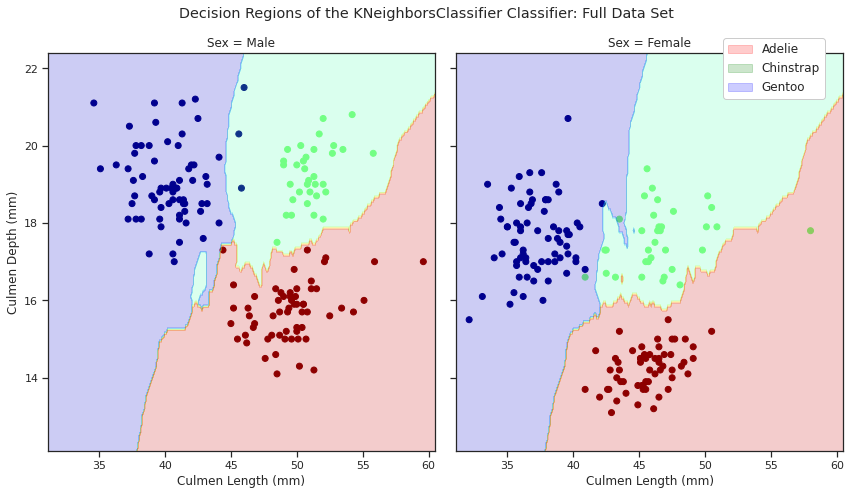

In [ ]:
DecisionRegion(KNN_model, X, y, 0.1)

####Ridge Regression Classification

The last model we are utilizing is the Ridge Classifier Model. It falls under the Ridge model which solves a regression model where the loss function is the least linear squares function (the least squares approximation of linear functions to data) with the l2 penalty (equals to the sums of the squares of the parameters). In other words, the Ridge Classifier converts our target values into {-1, 1}, depending on the class it belongs to, before building a Ridge model to predict the target variable.

#####Fitting and Scoring Ridge Model without CV

First we shall fit and score the original data using the default parameter of RidgeClassifier() (alpha = 1) in order to show the differences between the original training and testing scores to the scores after the data has gone through cross validation.

In [ ]:
clf = RidgeClassifier()
orig = clf.fit(X_train, y_train)

print('Original Training Data: {0}'.format(orig.score(X_train, y_train)))
print('Original Testing Data: {0}'.format(orig.score(X_test, y_test)))

Original Training Data: 0.9767441860465116
Original Testing Data: 0.9545454545454546


#####Finding Best Hyper Parameter (alpha) with Grid Search Cross Validation


From the numbers representing the original training and testing scores, there is a need to cross validate the data in order to increase the accuracy of our scores. To do that, we would need to find the best hyper paramater for RidgeClassifer() with GridSearchCV(). First, we make a new model of RidgeClassifier() with its default parameter before creating cross validator cv to call RepeatedKFold(). RepeatedKFold() allows us to repeat the number of folds to increase accuracy among many samples taken from the data. In this case, we are using the default values for n_splits (number of folds) and n_repeats (number of repeats), while setting random_state (which controls randomness factor) equal to an integer. After establishing our model and cross validator, we create a grid from a dict() object to input an array of numbers from 0 to 1 (incremented by 0.01), under the alpha column, to insert model, grid, and cv into GridSearchCV(). As mentioned in the Nearest Neighbors Classification model, GridSearchCV() allows us to find the best parameter among an array of values. From the final result of the cross validation, the best parameter for RidgeClassification() is alpha = 0.

In [ ]:
model = RidgeClassifier(alpha = 1)
cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, cv = cv, n_jobs = -1)
results = search.fit(X_train, y_train)

print('Best Parameter: {0}'.format(results.best_params_))

Best Parameter: {'alpha': 0.0}


#####Fitting and Scoring New Model

After cross validating the data, we can fit and score our newest model of RidgeClassification() with the best parameter to observe the new training and testing scores. As we can see, the difference between the training and testing scores is much smaller than the original scores, indicating that cross validation has increased our accuracy. Additionally, RidgeClassification() having alpha = 0 is practically the same thing as running a Linear Regression model, since the L2 penalty is 0.

In [ ]:
modelRidge = fit_and_score(RidgeClassifier(alpha = 0))

Score on the training data: 0.9767441860465116
Score on the testing data: 0.9545454545454546


#####Confusion Matrix for Ridge

When calling ConfusionMatrix() for our RidgeClassification() model, it reveals as accuracy of 95% with all predicted Adelie and Gentoo being actual Adelie and Gentoo. Furthermore, it appears that 13 out of 16 were accurately predicted as Chinstrap while the remaining 3 were predicted to be Adelie. This could be because Chinstrap features (specifically 'Culmen Length (mm)' and 'Culmen Depth (mm)') are more similar to the Adelie than Gentoo.

In [ ]:
ConfusionMatrix(modelRidge)

Accuracy: 0.95
Confusion Matrix:


,Predicted Adelie,Predicted Chinstrap,Predicted Gentoo
Actual Adelie,30,0,0
Actual Chinstrap,3,13,0
Actual Gentoo,0,0,20


#####Decision Region for Ridge

When we call DecisionRegion() for the RidgeClassification() model, it is evident that the the data is mostly accurate according to the different regions representing the unique species. From looking at the Male graph, there is little overlapping with at least 1 single dot reaching another region. However, when we look at the Female graph there is a distinct difference in accuracy. It can be assumed that the reason was to why the accuracy of predicting the Chinstrap was much lower in comparison to predicting the Adelie and Gentoo is because of the dots that are in a region of another species. Although it is curious how despite some Chinstrap plots leaning towards the Gentoo region moreso than the Adelie region, the Chinstrap were more likely to be predicted as Adelie than Gentoo. This trend could be explained by assuming that 'Culmen Length (mm)' has higher priority over 'Culmen Depth (mm)' when predicting the species of a penguin. In doing so, it could be said that there is a higher chance of Chinstrap being predicted as Adelie rather than Gentoo because Chinstrap penguins are more similar to Adelie penguins due to their 'Culmen Length (mm)'.

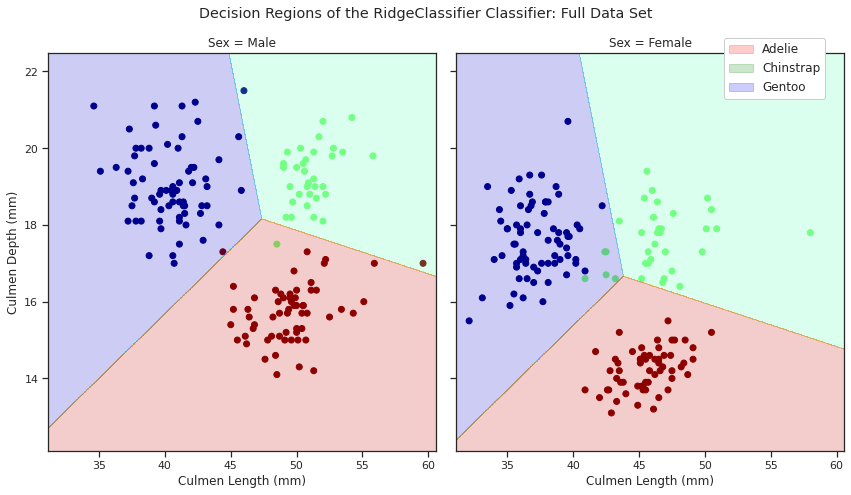

In [ ]:
DecisionRegion(modelRidge, X, y)

###Discussion

From a simple dataset of penguin characteristics, we were able to build and evaluate several machine learning models for predicting the species of any given penguin. With the proper clean up and processing, to the feature selection and cross-validation procedures, it allowed for a proper visualization of how different kinds of models can represent and predict data. After observing the various models, we can conclude that the overall performance of the models is exceptionally well. Although some models did perform better than others in terms of accuracy and overfitting, they all ended with above a .90 score in unseen test data, with two of the models even being above .95 in the test data. 

The most efficient and strongest combination of classification models to be used is most likely the `Logistic Regression model` and the `Ridge Regression model`. Within the `Logistic Regression model`, its ability to assign probability to the inputted data points and make predictions of any given observation with the use of only cross-validating one hyper parameter, allows for it to be easily comprehensible and still provide an excellent score in terms of test data. Alongside that there was the `Ridge Regression Model` which takes a variant of the linear regression algorithm but gives the ability to foresee overfitting and help balance and generalize new data accordingly. This capability is what made it beneficial to predicting penguin species based upon features. Although `Nearest Neighbors Classification` still did great in its testing scores, this model has much more room for overfitting unlike the `Ridge Regression Model`, and takes in a large amount of hyper parameters that you have to cross-validate unlike the `Logistic Regression model`.

In terms of the strongest features/measurements to be used for these models, we provided a feature selection section where it goes into detail about the specifics, but it resulted in the best combination being `Sex` for our qualitative feature, and `Culmen Length (mm)` and `Culmen Depth (mm)` for our quantitative features. These three features are what we used for all various models, and as shown, it resulted in great predictions throughout, which is shown in our `Confusion Matrixes`. Almost every species was predicted accurately, give or take 1 or 2 incorrect penguins species.  

With more or different data, the model could be improved by including additional features that would help distinguish the penguin species even more. Likewise, our models’ performances could be even better because it would reduce overfitting and increase generalization. Maybe a new data feature of `Neck Length (mm)` would give more distinction to each penguin, allowing for stronger predictive data and better model outcomes. 

Overall, the results from these three models presented us with key capabilities of machine learning and granted us the opportunity to formulate, code, and design our own program. Each model had its unique attributes and combined with the most influential features, it was able to make some significant predictions.